Real-Time Data Integration Methods

Example using Python to simulate real-time data collection and  visualization of the real-time data.

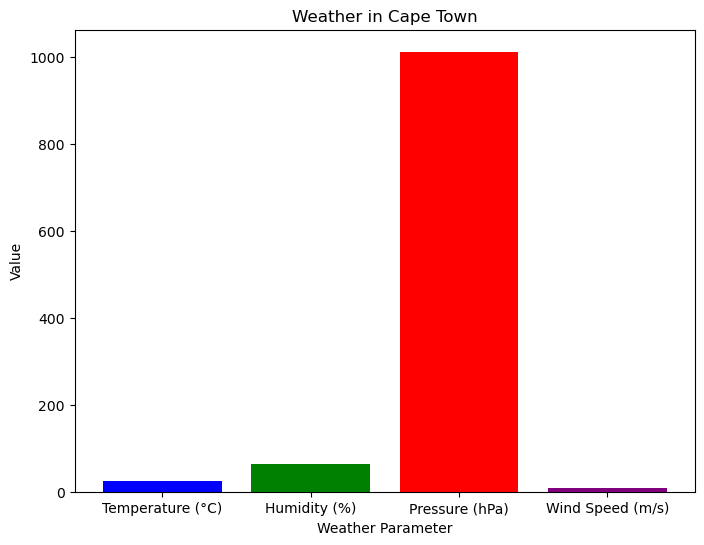

In [ ]:
import requests
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
from io import BytesIO
from datetime import datetime

# Replace with your actual OpenWeatherMap API Key
API_KEY = '266cb67c4e1d960e0fa37ffb34c72e88'  # Make sure to use your actual API key here

# Function to fetch weather data
def fetch_weather():
    city_name = city_entry.get()  # Get the city name from the input field
    if not city_name:
        messagebox.showwarning("Input Error", "Please enter a city name.")
        return
    # URL to fetch the current weather
    URL = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_KEY}&units=metric'
    # Send GET request to the OpenWeatherMap API
    response = requests.get(URL)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()
        if 'name' in data:
            city_name = data['name']
            temperature = data['main']['temp']
            weather_description = data['weather'][0]['description']
            humidity = data['main']['humidity']
            pressure = data['main']['pressure']
            wind_speed = data['wind']['speed']
            icon_code = data['weather'][0]['icon']  # Weather icon code
            # URL to fetch the weather icon
            icon_url = f'http://openweathermap.org/img/wn/{icon_code}.png'
            # Fetch the icon image
            icon_response = requests.get(icon_url)
            icon_image = Image.open(BytesIO(icon_response.content))
            icon_image = icon_image.resize((50, 50))  # Resize icon
            icon_photo = ImageTk.PhotoImage(icon_image)
            # Display the weather information in the label
            result_label.config(text=f"Weather in {city_name}:\n"
                                    f"Temperature: {temperature}°C\n"
                                    f"Description: {weather_description}\n"
                                    f"Humidity: {humidity}%\n"
                                    f"Pressure: {pressure} hPa\n"
                                    f"Wind Speed: {wind_speed} m/s\n"
                                    f"Last Updated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            # Display the weather icon
            icon_label.config(image=icon_photo)
            icon_label.image = icon_photo  # Keep a reference to avoid garbage collection

            # Create a bar chart for the weather data
            labels = ['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)']
            values = [temperature, humidity, pressure, wind_speed]

            plt.figure(figsize=(8, 6))
            plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
            plt.title(f"Weather in {city_name}")
            plt.xlabel("Weather Parameter")
            plt.ylabel("Value")
            plt.show()
        else:
            messagebox.showerror("Error", "Could not retrieve weather data. Please try again.")
    else:
        messagebox.showerror("Error", f"Failed to fetch data. Status Code: {response.status_code}")

    # Schedule the function to fetch weather every 60 seconds
    root.after(60000, fetch_weather)

# Create the main window
root = tk.Tk()
root.title("Weather App")

# Create and place the city input label and text entry
city_label = tk.Label(root, text="Enter City Name:")
city_label.pack(pady=10)

city_entry = tk.Entry(root, width=30)
city_entry.pack(pady=10)

# Create and place the button to fetch weather
fetch_button = tk.Button(root, text="Get Weather", command=fetch_weather)
fetch_button.pack(pady=10)

# Create a label to display weather results
result_label = tk.Label(root, text="", justify="left")
result_label.pack(pady=10)

# Create a label to display the weather icon
icon_label = tk.Label(root)
icon_label.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()
